In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engineering-placements-prediction/collegePlace.csv


# Importing Required Libraries 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

![](https://www.pngitem.com/pimgs/m/215-2156289_training-and-placement-hd-png-download.png)

# Placement refers to the process of connecting the selected person and the employer in order to establish an ongoing employment relationship. In this step the employee is given the activities he/she needs to perform and is told about his/her duties. Placement is usually followed by the orientation process.

# Reading the CSV File

In [3]:
data = pd.read_csv('/kaggle/input/engineering-placements-prediction/collegePlace.csv')

In [4]:
data.head() #Displaying head of the data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
df = pd.read_csv('/kaggle/input/engineering-placements-prediction/collegePlace.csv')

# Visualizations

<BarContainer object of 2966 artists>

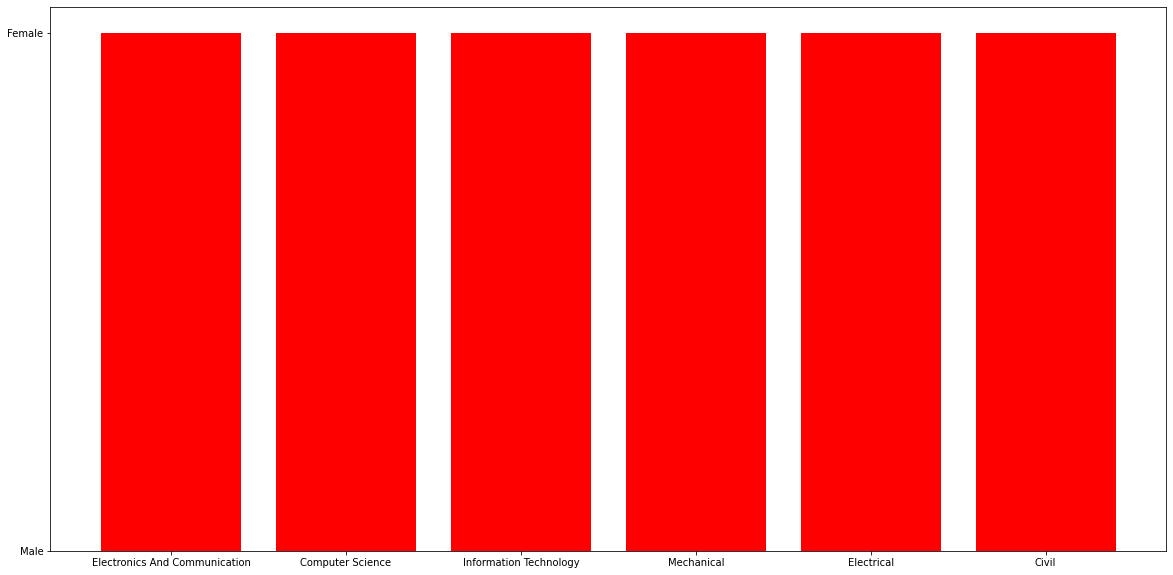

In [6]:
plt.figure(figsize=(20,10)) #Streams Vs. Gender
plt.bar(df.Stream,df.Gender,color='red')

<BarContainer object of 2966 artists>

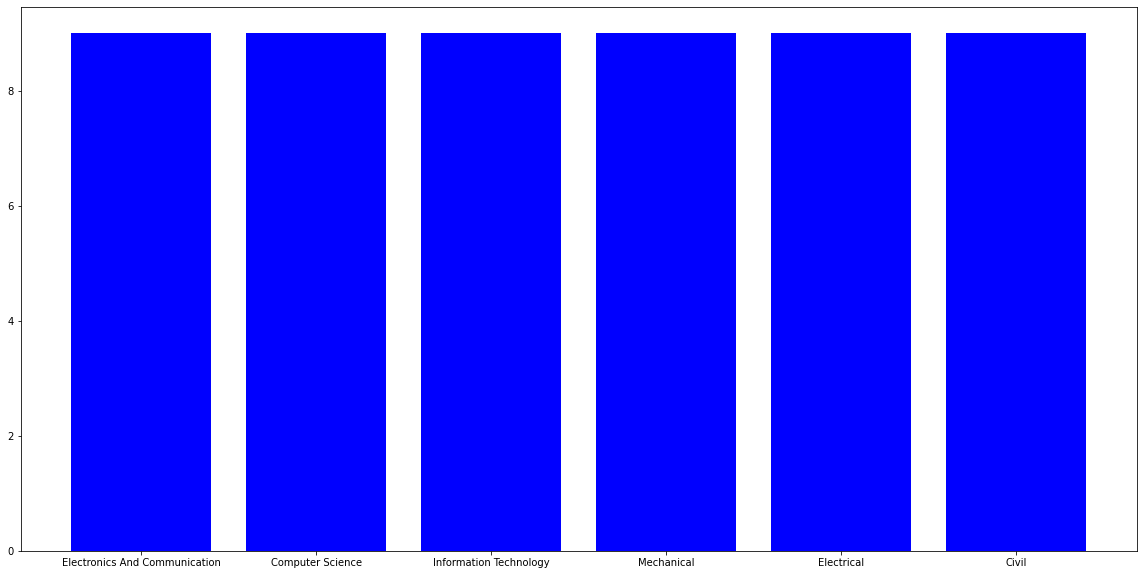

In [7]:
plt.figure(figsize=(20,10)) #Streams Vs. CGPA
plt.bar(df.Stream,df.CGPA,color='blue')

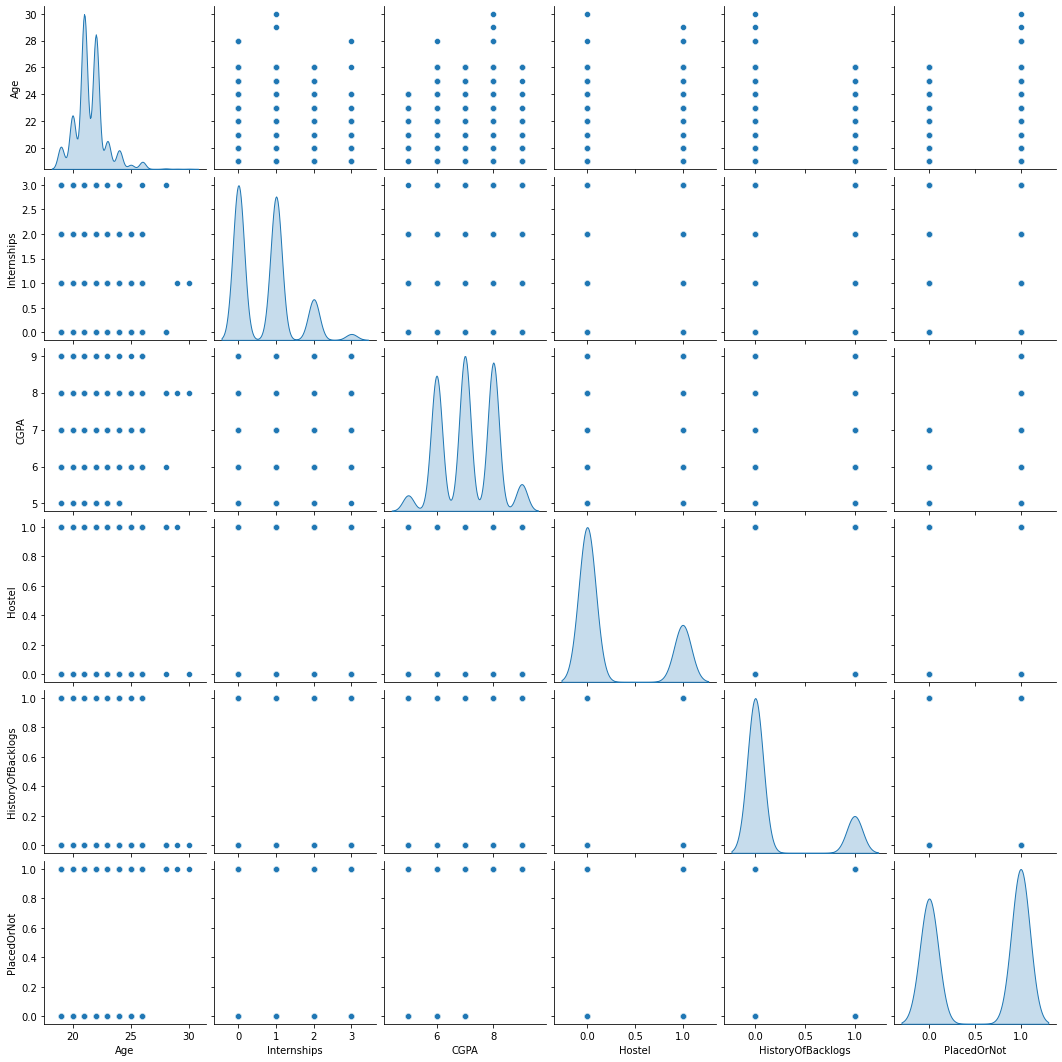

In [8]:
import seaborn as sns #Pairplot
sns.pairplot(df,diag_kind='kde')

# Let's us check for NULL Values

In [9]:
data.isnull().sum() #No Null values are there

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [10]:
data.describe() #Basic Info about the data

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


# Now, Let's Encode the Data

In [11]:
data['Internships'][data['Internships'] == 0] = 'No'
data['Internships'][data['Internships'] == 1] = 'Yes'

data['Hostel'][data['Hostel'] == 0] = 'No'
data['Hostel'][data['Hostel'] == 1] = 'Yes'

data['HistoryOfBacklogs'][data['HistoryOfBacklogs'] == 0] = 'No'
data['HistoryOfBacklogs'][data['HistoryOfBacklogs'] == 1] = 'Yes'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
data.head() #Displaying head of the data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,Yes,8,Yes,Yes,1
1,21,Female,Computer Science,No,7,Yes,Yes,1
2,22,Female,Information Technology,Yes,6,No,No,1
3,21,Male,Information Technology,No,8,No,Yes,1
4,22,Male,Mechanical,No,8,Yes,No,1


In [13]:
data = pd.get_dummies(data, drop_first=True) #Encoding

In [14]:
data.head() #Displaying head of the data

,Age,CGPA,PlacedOrNot,Gender_Male,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical,Internships_3,Internships_No,Internships_Yes,Hostel_Yes,HistoryOfBacklogs_Yes
0,22,8,1,1,0,0,1,0,0,0,0,1,1,1
1,21,7,1,0,1,0,0,0,0,0,1,0,1,1
2,22,6,1,0,0,0,0,1,0,0,0,1,0,0
3,21,8,1,1,0,0,0,1,0,0,1,0,0,1
4,22,8,1,1,0,0,0,0,1,0,1,0,1,0


# SPLITTING THE DATASET INTO TRAIN AND TEST DATA¶

In [15]:
# Splitting the dataset into train and test datasets
# 80% Train Data + 20% Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('PlacedOrNot', 1), data['PlacedOrNot'], test_size = .2)

# Using XGBoost

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
# Define the model

    
    # defining the model
clf = XGBClassifier(learning_rate=0.09, 
                    n_estimators=100, 
                    use_label_encoder=False,
                    random_state=42)
    
clf.fit(X_train, y_train, eval_metric='logloss')
predictions = clf.predict(X_test) 
print("accuracy_score: " + str(accuracy_score(y_test, predictions)))

accuracy_score: 0.877104377104377


# CREATING CONFUSION MATRIX

In [17]:
#Function for plotting Confusion Matrix


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
#Feeding parameters in the CM Function

cm = confusion_matrix(y_true=y_test, y_pred=predictions)

In [19]:
#Labels for the CM

cm_plot_labels = ['Not Placed','Placed']

# PLOTTING THE CONFUSION MATRIX¶

Confusion matrix, without normalization
[[243  15]
 [ 58 278]]


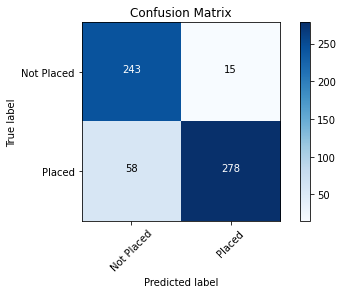

In [20]:
#Plotting the CM

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Plotting the ROC Curve

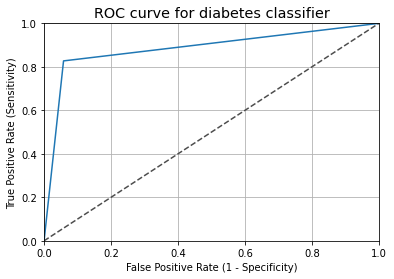

In [21]:
from sklearn.metrics import roc_curve, auc #for model evaluation

fpr, tpr, thresholds = roc_curve(y_test, predictions)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

**After plotting the ROC Curve, we can see that our model has performed really well on the Test Dataset.**